In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
import os

path = os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\train/')
classes = {'adenocarcinoma':0, 'large_cell_carcinoma':1, 'normal':2, 'squamous_cell_carcinoma':3}

In [13]:
import cv2
X = []
Y = []
for cls in classes:
    pth = r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\train/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [14]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [15]:
np.unique(Y)

array([0, 1, 2, 3])

In [16]:
pd.Series(Y).value_counts()

0    195
3    155
2    148
1    115
dtype: int64

In [17]:
X.shape, X_updated.shape

((613, 200, 200), (613, 40000))

# Visualize Data

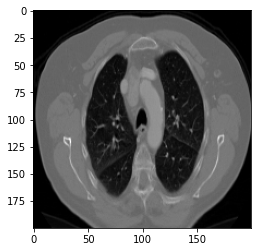

In [18]:
plt.imshow(X[0], cmap='gray')

In [19]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(613, 40000)

In [20]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [21]:
xtrain.shape, xtest.shape

((490, 40000), (123, 40000))

# Feature Scaling

In [22]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


# PCA

In [23]:
from sklearn.decomposition import PCA
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(490, 40000) (123, 40000)


# Train Model

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [25]:
sv = SVC()
sv.fit(xtrain, ytrain)


SVC()

# Evaluation 

In [26]:
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.8373983739837398


In [27]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9428571428571428
Testing Score: 0.7804878048780488


# Prediction

In [28]:
pred = sv.predict(xtest)

In [29]:
misclassified=np.where(ytest!=pred)
misclassified

(array([  3,   4,   6,  17,  23,  25,  30,  33,  37,  44,  45,  48,  49,
         57,  59,  61,  62,  63,  64,  69,  71,  76,  82, 106, 107, 109,
        118], dtype=int64),)

In [30]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  27
0 0


# Test Model

In [31]:
dec = {0:'Adenocarcinoma', 1:'Large Scale Carcinoma', 2:'Normal', 3:'Squamous Cell Carcinoma'}

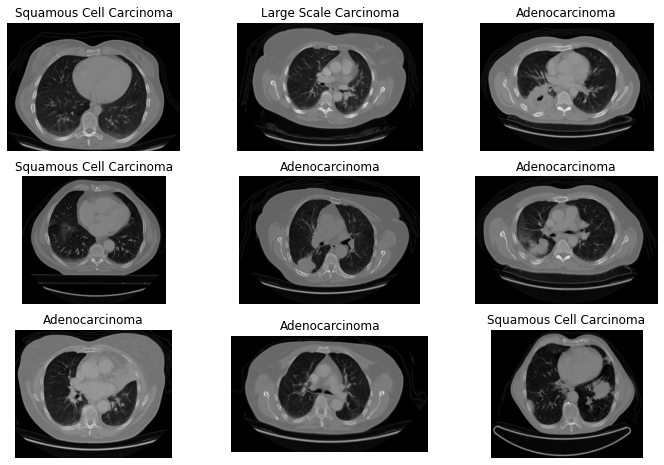

In [35]:
plt.figure(figsize=(12,8))
p = os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test/')
c=1
for i in os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\adenocarcinoma/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\adenocarcinoma/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

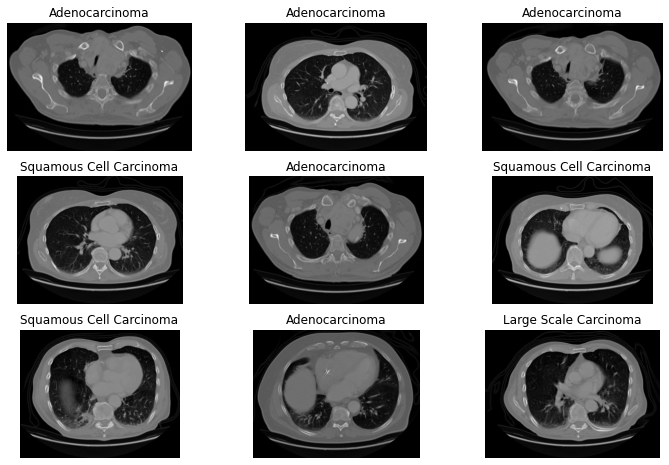

In [39]:
plt.figure(figsize=(12,8))
p = os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test/')
c=1
for i in os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\large.cell.carcinoma/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\large.cell.carcinoma/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

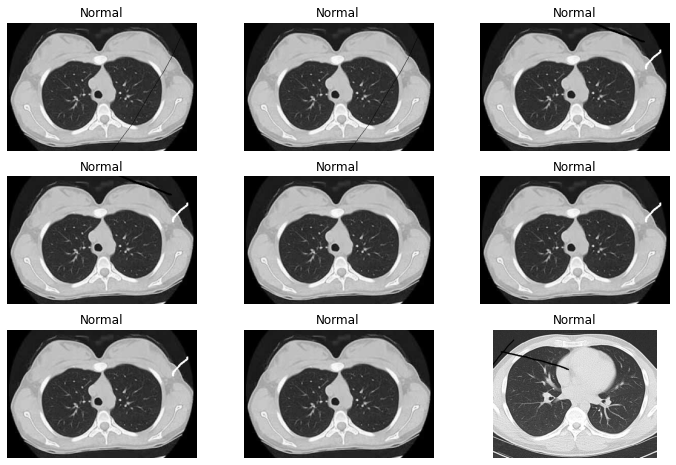

In [41]:
plt.figure(figsize=(12,8))
p = os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test/')
c=1
for i in os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\normal/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\normal/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

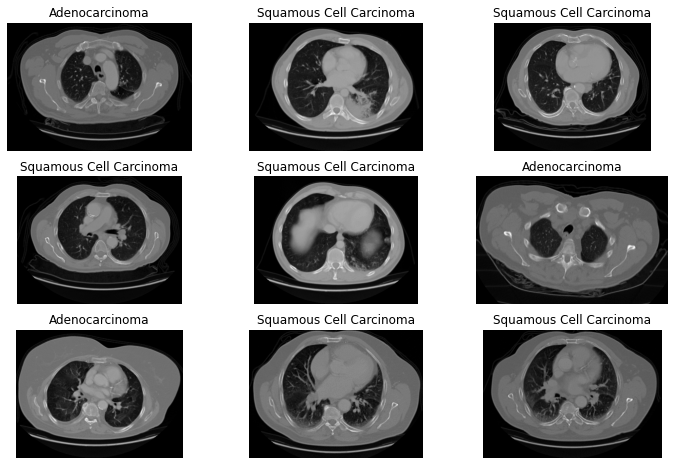

In [42]:
plt.figure(figsize=(12,8))
p = os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test/')
c=1
for i in os.listdir(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\squamous.cell.carcinoma/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread(r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test\squamous.cell.carcinoma/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1